# Forecasting Time Series Data Using Facebook's Prophet Library

**Prophet's web [site](https://facebookincubator.github.io/prophet/)**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime

**Read data from the clipboard (or from csv, from database, etc) and create a Pandas dataframe:**

In [6]:
df = pd.read_csv('TS.csv', parse_dates=[0])
columns = ['ds','y']
df.columns = columns

In [7]:
df.head()

,ds,y
0,1965-01-01,154
1,1965-02-01,96
2,1965-03-01,73
3,1965-04-01,49
4,1965-05-01,36


### Per [documentation](https://facebookincubator.github.io/prophet/docs/quick_start.html#python-api), the datestamp column (```ds```), must of type ```date``` or ```datetime```.

Let's double-check:

In [8]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

### Let's plot the current trend

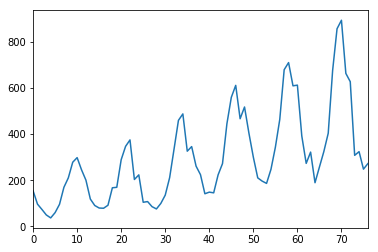

In [22]:
df['y'].plot()
plt.show()

### Let's use statsmodels' new seasonal_decompose() function:

It requires that we have a Series object with date/datetime index.

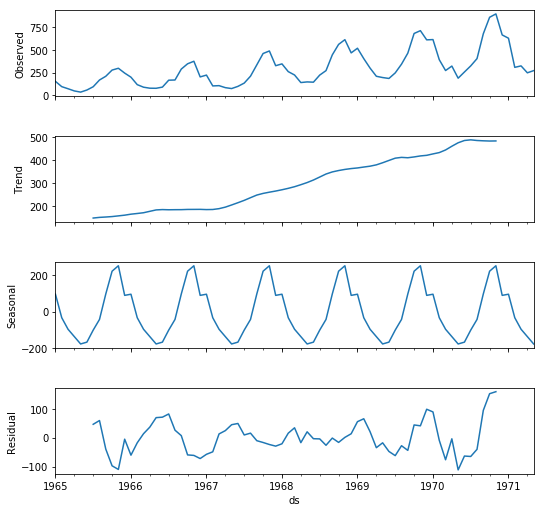

In [29]:
import statsmodels.tsa.api as smt
df2 = df.set_index('ds')
fig = smt.seasonal_decompose(df2.y).plot()
fig.set_size_inches(8,8)
plt.show()

### Most real-world time series data follow a multiplicative trend, not additive trend.

Prophet is based on additive model, so we must convert our multiplicative data to additive by taking the log of the values:

In [10]:
df['y'] = np.log(df['y'])
df.tail()

,ds,y
72,1971-01-01,6.442540
73,1971-02-01,5.730100
74,1971-03-01,5.780744
75,1971-04-01,5.513429
76,1971-05-01,5.605802


In [11]:
df.head()

,ds,y
0,1965-01-01,5.036953
1,1965-02-01,4.564348
2,1965-03-01,4.290459
3,1965-04-01,3.891820
4,1965-05-01,3.583519


### Now fit the data using Prophet

In [12]:
m = Prophet()
m.fit(df);

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


### Tell Prophet to give us forecasts of 24 months into the future

In [13]:
future_periods = 24
future = m.make_future_dataframe(periods=future_periods, freq='M')
future.tail(future_periods)

,ds
77,1971-05-31
78,1971-06-30
79,1971-07-31
80,1971-08-31
81,1971-09-30
82,1971-10-31
83,1971-11-30
84,1971-12-31
85,1972-01-31
86,1972-02-29


### Make prediction with upper and lower bounds:

Need to apply exponent/anti-Log function since we took the log of our data:

In [16]:
forecast = m.predict(future)
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']]).tail(future_periods)

,yhat,yhat_lower,yhat_upper
77,286.930269,231.726758,352.741915
78,354.658728,292.106550,427.341447
79,470.485532,391.257764,564.723339
80,796.287871,668.356044,968.656340
81,1096.166942,903.841948,1328.361844
82,1213.423850,993.280650,1459.897320
83,745.521147,619.167213,898.776776
84,834.356715,683.877689,1015.820023
85,476.296341,397.461759,581.008246
86,379.071550,313.662301,458.394533


### To send forecast to clipboard:

In [17]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']]).tail(future_periods).to_clipboard()

### Make plot of prediction

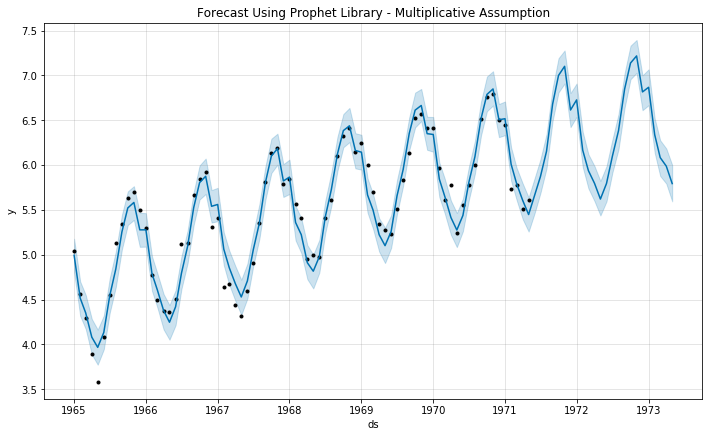

In [15]:
fig, axis = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=axis)
plt.title('Forecast Using Prophet Library - Multiplicative Assumption')
plt.show()

### What happens if we assume the data as additive by not taking the log of the values

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


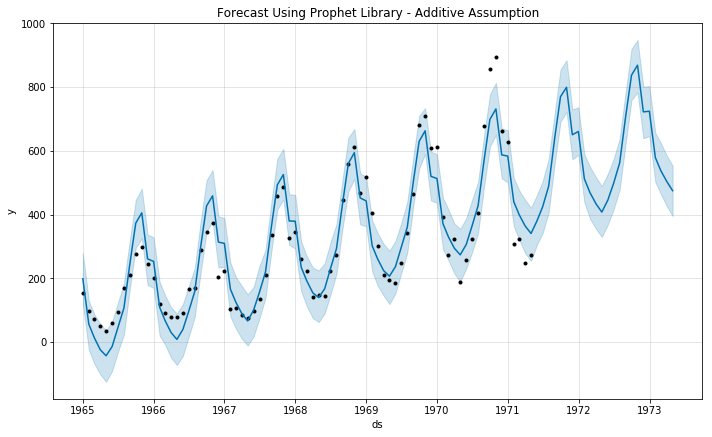

In [18]:
df = pd.read_csv('TS.csv', parse_dates=[0])
columns = ['ds','y']
df.columns = columns

m = Prophet()
m.fit(df);

future = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future)

fig, axis = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=axis)
plt.title('Forecast Using Prophet Library - Additive Assumption')
plt.show()